A company has ten employees, seven machines, and thirty jobs to be completed. The time required
to complete job $j$ by employee $e$ using machine $m$ is given and denoted by $t_{jem}$. An employee can
only perform one job at a time. Similarly, a machine can only execute one job at a time. A job
cannot be divided among employees. Also, a job cannot be divided betwee machines. Develop a
mathematical formulation that can be used to obtain the optimal job-employee-machine
assignment if the company wants to minimize the total time spent by all machines to complete the
seven jobs. Generate different scenarios and, using Cplex, implement and solve your formulation
for these scenarios.

<h4>Sets and Indicies</h4>

$\mathcal{J}$: A set representing the Jobs. $|\mathcal{J}| = \textbf{J}$<br>
$\mathcal{E}$: A set representing the Employees. $|\mathcal{E}| = \textbf{E}$ <br>
$\mathcal{M}$: A set representing the Machines. $|\mathcal{M}| = \textbf{M}$ <br>

<h4>Data</h4>

$T$: 3D-matrix of the time required to complete job $j$ by employee $e$ using machine $m$, where each element is denoted as $t_{jem}$. <br>

<h4>Decision Variable</h4>

$X$: 3D-binary-matrix of the which each employee in $\mathcal{E}$ should spend using each machine in $\mathcal{M}$ to complete every job in $\mathcal{J}$, where each element is denoted as $x_{jem}$ <br>
<!-- $Y$: A column vector representing which employee will do which job, where each element is denoted as $y_{je}$ <br> -->

<h4>Function</h4>

\begin{align*}
\ {\mathrm{minimize }} & \; \sum_{i=1}^{\textbf{J}}\sum_{u=1}^{\textbf{E}}\sum_{o=1}^{\textbf{M}}{x_{iou}t_{iou}}\\
\ \text{subject to:} \\
& \sum_{u=1}^{\textbf{E}}\sum_{o=1}^{\textbf{M}}{x_{juo}} = 1 \; ; \forall j \in \mathcal{J}, \\
& x_{jem} \in {0, 1}
\end{align*}


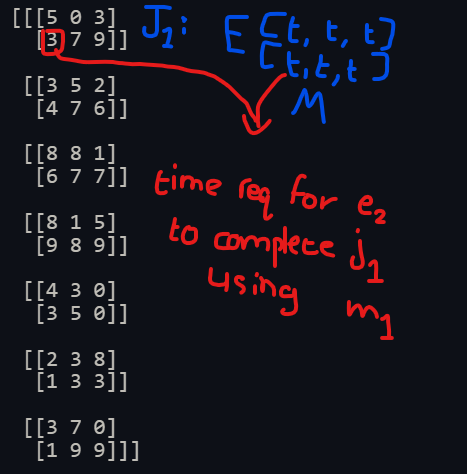

In [189]:
from docplex.mp.model import Model
import numpy as np
import json

### Numbers too large to solve.
JOBS = 3
EMPLOYEES = 10
MACHINES = 5

def get_model(T):
    m = Model(name = 'Assignment')

    dv = m.binary_var_list(EMPLOYEES*MACHINES*JOBS, name = 'x')

    for i in range(JOBS):
        summation = 0
        for u in range(EMPLOYEES):
            for o in range(MACHINES):
                summation += dv[i*EMPLOYEES*MACHINES + u*MACHINES + o]

        m.add_constraint(summation == 1)

    function_summation = 0
    T_flat = T.flatten()
    for i in range(JOBS):
        for u in range(EMPLOYEES):
            for o in range(MACHINES):
                function_summation += dv[i*EMPLOYEES*MACHINES + u*MACHINES + o] * T_flat[i*EMPLOYEES*MACHINES + u*MACHINES + o]

    m.minimize(function_summation)

    m.export_as_lp("Assignment_1.lp")

    return m

In [190]:
import numpy as np
np.random.seed(0)

T = np.random.randint(4, 20, (JOBS, EMPLOYEES, MACHINES))

model = get_model(T)
model.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 33.000000 after 0.00 sec. (0.01 ticks)
Found incumbent of value 12.000000 after 0.00 sec. (0.01 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 3 rows and 150 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.05 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.07 ticks)
Parallel b&c, 6 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.07 ticks)


docplex.mp.solution.SolveSolution(obj=12,values={x_39:1,x_55:1,x_130:1})

In [191]:
print(model.solve_status)
print()
# model.solution.get_values(model.use_vars)
solution = json.loads(model.solution.export_as_json_string())
indicies = [int(index['index']) for index in solution['CPLEXSolution']['variables']]

JobSolveStatus.OPTIMAL_SOLUTION



In [192]:
print(T)

for i in range(JOBS):
    for u in range(EMPLOYEES):
        for o in range(MACHINES):
            # print(indicies)
            if (i*EMPLOYEES*MACHINES + u*MACHINES + o) in indicies:
                print(f"Job {i+1} is assigned to Employee {u+1} on Machine {o+1} with a cost of {T[i][u][o]}")

[[[16 19  9  4  7]
  [15  7 11 13  7]
  [ 9  6  8 11 10]
  [12 12 16 14  5]
  [10 11 11 18 12]
  [ 5  9 13 17 12]
  [13  8  7  4  7]
  [ 9 18 19 19  4]
  [ 6  7 12  5  7]
  [17  7  7 18 11]]

 [[ 4  5 13 13 19]
  [ 4 19 14  8 11]
  [ 7 18 15  6 11]
  [16  6  4  4  8]
  [ 9  9 10 12  8]
  [ 5 19  8 13 14]
  [14 19 12  5  5]
  [11 13 13  7 10]
  [11 15 18  6 15]
  [ 4 18  7  9 16]]

 [[13 14  8 15  8]
  [10  8 19 19  8]
  [ 7 16  8  8 12]
  [18 19  8  7 14]
  [11 19 17  9  9]
  [ 4  5  9 13  7]
  [ 4 19  9 18  4]
  [ 5  6  8  6  4]
  [17  7  6 14 17]
  [ 4 11  9 13 19]]]
Job 1 is assigned to Employee 8 on Machine 5 with a cost of 4
Job 2 is assigned to Employee 2 on Machine 1 with a cost of 4
Job 3 is assigned to Employee 7 on Machine 1 with a cost of 4
